In [1]:
import pandas as pd
data = pd.read_csv("pima-indians-diabetes.data.csv", header = None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = data.iloc[:, :-1]
y = data.iloc[:, 8]
X.shape, y.shape

((768, 8), (768,))

In [3]:
from neuroboa.nn import NN
from neuroboa.layers import Dense, Activation
from neuroboa.optims import Adam, SGD, Adagrad
from neuroboa.functions import ReLU, Sigmoid, Swish, Softmax, Tanh
from neuroboa.losses import BinaryCrossEntropy, MSE
from neuroboa.constants import TQDM_NOTEBOOK, TQDM_TERMINAL

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
one_hot = OneHotEncoder()
fit = one_hot.fit(y.values.reshape(-1, 1))
labels = fit.transform(y.values.reshape(-1, 1))
labels.toarray()

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [5]:
from sklearn.model_selection import train_test_split

X_tr, X_t, y_tr, y_t = train_test_split(X, labels.toarray(), test_size = 0.33, random_state = 42)

In [6]:
y_tr.shape

(514, 2)

In [15]:
nn = NN([
    Dense(1000, input_shape = (8, )),
    Activation(ReLU()),
    Dense(100),
    Activation(Tanh()),
    Dense(500),
    Activation(ReLU()),
    Dense(2),
    Activation(Sigmoid())
])

nn.fit(X_tr, y_tr, epochs = 150, batch_size = 10, optimizer = Adagrad(), loss = BinaryCrossEntropy(), show_progress = TQDM_TERMINAL)

Epoch: 150: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 150/150 [00:01<00:00, 87.89it/s]


Plot: True


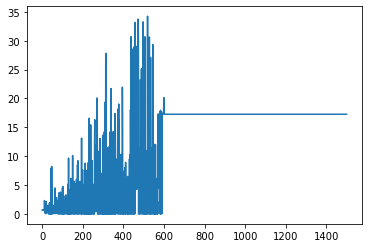

In [16]:
import matplotlib.pyplot as plt
import numpy as np
loss_list = nn.get_loss_list()
plt.plot(range(len(loss_list)), loss_list)

In [17]:
from keras.models import Sequential
from keras import layers
from keras.metrics import binary_accuracy

model = Sequential([
    layers.Dense(1000, activation = "relu"),
    layers.Dense(100, activation = "tanh"),
    layers.Dense(500, activation = "relu"),
    layers.Dense(2, activation = "sigmoid")
])

model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=[binary_accuracy])
history = model.fit(X_tr, y_tr, epochs=150, batch_size=10, verbose=2)

Epoch 1/150
52/52 - 1s - loss: 0.6864 - binary_accuracy: 0.6226
Epoch 2/150
52/52 - 0s - loss: 0.6792 - binary_accuracy: 0.7043
Epoch 3/150
52/52 - 0s - loss: 0.6727 - binary_accuracy: 0.7325
Epoch 4/150
52/52 - 0s - loss: 0.6665 - binary_accuracy: 0.7325
Epoch 5/150
52/52 - 0s - loss: 0.6601 - binary_accuracy: 0.7296
Epoch 6/150
52/52 - 0s - loss: 0.6537 - binary_accuracy: 0.7247
Epoch 7/150
52/52 - 0s - loss: 0.6474 - binary_accuracy: 0.7286
Epoch 8/150
52/52 - 0s - loss: 0.6410 - binary_accuracy: 0.7315
Epoch 9/150
52/52 - 0s - loss: 0.6345 - binary_accuracy: 0.7296
Epoch 10/150
52/52 - 0s - loss: 0.6279 - binary_accuracy: 0.7315
Epoch 11/150
52/52 - 0s - loss: 0.6214 - binary_accuracy: 0.7335
Epoch 12/150
52/52 - 0s - loss: 0.6146 - binary_accuracy: 0.7354
Epoch 13/150
52/52 - 0s - loss: 0.6076 - binary_accuracy: 0.7344
Epoch 14/150
52/52 - 0s - loss: 0.6007 - binary_accuracy: 0.7354
Epoch 15/150
52/52 - 0s - loss: 0.5937 - binary_accuracy: 0.7374
Epoch 16/150
52/52 - 0s - loss: 0.

Epoch 127/150
52/52 - 0s - loss: 0.4173 - binary_accuracy: 0.8016
Epoch 128/150
52/52 - 0s - loss: 0.4171 - binary_accuracy: 0.8016
Epoch 129/150
52/52 - 0s - loss: 0.4168 - binary_accuracy: 0.8006
Epoch 130/150
52/52 - 0s - loss: 0.4164 - binary_accuracy: 0.8016
Epoch 131/150
52/52 - 0s - loss: 0.4162 - binary_accuracy: 0.8035
Epoch 132/150
52/52 - 0s - loss: 0.4159 - binary_accuracy: 0.8045
Epoch 133/150
52/52 - 0s - loss: 0.4158 - binary_accuracy: 0.8016
Epoch 134/150
52/52 - 0s - loss: 0.4154 - binary_accuracy: 0.8045
Epoch 135/150
52/52 - 0s - loss: 0.4151 - binary_accuracy: 0.8035
Epoch 136/150
52/52 - 0s - loss: 0.4149 - binary_accuracy: 0.8025
Epoch 137/150
52/52 - 0s - loss: 0.4146 - binary_accuracy: 0.8054
Epoch 138/150
52/52 - 0s - loss: 0.4143 - binary_accuracy: 0.8035
Epoch 139/150
52/52 - 0s - loss: 0.4141 - binary_accuracy: 0.8045
Epoch 140/150
52/52 - 0s - loss: 0.4139 - binary_accuracy: 0.8025
Epoch 141/150
52/52 - 0s - loss: 0.4136 - binary_accuracy: 0.8045
Epoch 142/

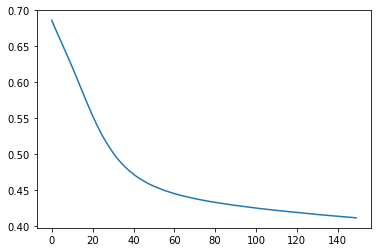

In [18]:
plt.plot(history.history["loss"])

In [19]:
import numpy as np
from keras.metrics import binary_crossentropy

y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]

print(binary_crossentropy(y_true, y_pred).numpy())
print(BinaryCrossEntropy().loss(np.array(y_true), np.array(y_pred)))

[0.03419546 1.3391274 ]
[0.03419553 1.33912784]


In [20]:
from sklearn.metrics import log_loss, accuracy_score


In [21]:
import numpy as np
outputs = np.round(nn.predict(X_t))
keras_outputs = np.round(model.predict(X_t))
accuracy_score(outputs, y_t), accuracy_score(keras_outputs, y_t)

(0.0, 0.7598425196850394)